In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import numpy as np

In [8]:
filepath_ANUClim = "Milgdarra_ANUClim_daily_rain_2017-2024.nc"
filepath_SILO = ""
filepath_moisture = "Milgdarra_OzWALD_8day_soilmoisture_2017-2024.nc"

In [4]:
!ls nci_data/Milgdarra_OzWaldSILO_daily_rain_2017-2024

2017.daily_rain.nc 2019.daily_rain.nc 2021.daily_rain.nc 2023.daily_rain.nc
2018.daily_rain.nc 2020.daily_rain.nc 2022.daily_rain.nc


In [33]:
filepath_SILO_2020 = "nci_data/Milgdarra_OzWaldSILO_daily_rain_2017-2024/2020.daily_rain.nc"
ds = xr.open_dataset(filepath_SILO_2020)
north, south, west, east = -34.350050, -34.479314, 148.427637, 148.543866
ds_milgdarra_2020 = ds.sel(lon=slice(west, east), lat=slice(south, north))
ds_milgdarra_2020

<xarray.Dataset> Size: 15kB
Dimensions:     (lat: 2, lon: 2, time: 366)
Coordinates:
  * lat         (lat) float64 16B -34.45 -34.4
  * lon         (lon) float64 16B 148.4 148.5
  * time        (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    daily_rain  (time, lat, lon) float64 12kB ...
    crs         |S1 1B ...
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    raster_source:            Gridded surface was created by interpolating ob...
    raster_source_additions:  and other suppliers (see the SILO webpage for d...
    metadata_url:             http://qldspatial.information.qld.gov.au/catalo...
    reference:                Jeffrey, S.J., Carter, J.O., Moodie, K.B.A. and...
    disclaimer:               1. The user accepts all responsibility and risk...

In [34]:
# Define the file paths and region of interest
filepaths = [
    "nci_data/Milgdarra_OzWaldSILO_daily_rain_2017-2024/2017.daily_rain.nc",
    "nci_data/Milgdarra_OzWaldSILO_daily_rain_2017-2024/2018.daily_rain.nc",
    "nci_data/Milgdarra_OzWaldSILO_daily_rain_2017-2024/2019.daily_rain.nc",
    "nci_data/Milgdarra_OzWaldSILO_daily_rain_2017-2024/2020.daily_rain.nc",
    "nci_data/Milgdarra_OzWaldSILO_daily_rain_2017-2024/2021.daily_rain.nc",
    "nci_data/Milgdarra_OzWaldSILO_daily_rain_2017-2024/2022.daily_rain.nc",
    "nci_data/Milgdarra_OzWaldSILO_daily_rain_2017-2024/2023.daily_rain.nc"
]

north, south, west, east = -34.350050, -34.479314, 148.427637, 148.543866

# Create an empty list to store the clipped datasets
clipped_datasets = []

for filepath in filepaths:
    ds = xr.open_dataset(filepath)
    ds_clipped = ds.sel(lon=slice(west, east), lat=slice(south, north))
    clipped_datasets.append(ds_clipped)

# Concatenate all the clipped datasets along the time dimension
combined_ds = xr.concat(clipped_datasets, dim='time')

# Check the result
combined_ds


<xarray.Dataset> Size: 105kB
Dimensions:     (time: 2556, lat: 2, lon: 2)
Coordinates:
  * lat         (lat) float64 16B -34.45 -34.4
  * lon         (lon) float64 16B 148.4 148.5
  * time        (time) datetime64[ns] 20kB 2017-01-01 2017-01-02 ... 2023-12-31
Data variables:
    daily_rain  (time, lat, lon) float64 82kB 0.0 0.0 0.1 0.0 ... 0.0 0.0 0.0
    crs         (time) |S1 3kB b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    raster_source:            Gridded surface was created by interpolating ob...
    raster_source_additions:  and other suppliers (see the SILO webpage for d...
    metadata_url:             http://qldspatial.information.qld.gov.au/catalo...
    reference:                Jeffrey, S.J., Carter, J.O., Moodie, K.B.A. and...
    disclaimer:               1. The user accepts all responsibility and risk...

In [36]:
ds = ds_milgdarra_2020

In [37]:
ds

<xarray.Dataset> Size: 15kB
Dimensions:     (lat: 2, lon: 2, time: 366)
Coordinates:
  * lat         (lat) float64 16B -34.45 -34.4
  * lon         (lon) float64 16B 148.4 148.5
  * time        (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    daily_rain  (time, lat, lon) float64 12kB ...
    crs         |S1 1B ...
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    raster_source:            Gridded surface was created by interpolating ob...
    raster_source_additions:  and other suppliers (see the SILO webpage for d...
    metadata_url:             http://qldspatial.information.qld.gov.au/catalo...
    reference:                Jeffrey, S.J., Carter, J.O., Moodie, K.B.A. and...
    disclaimer:               1. The user accepts all responsibility and risk...

In [39]:
rain = ds['daily_rain']
time = ds['time']
lat = ds['lat']
lon = ds['lon']

In [42]:
rain_at_time = rain.sel(time="2020-07-28")

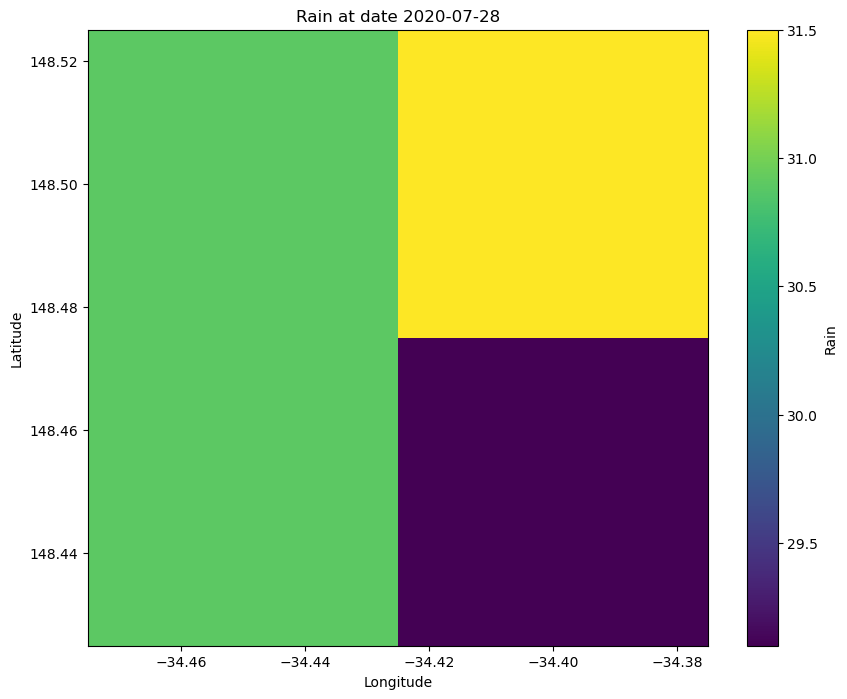

In [45]:
# Plot the 2D map at the selected timepoint
plt.figure(figsize=(10, 8))
plt.pcolormesh(lat, lon, rain_at_time, shading='nearest')
plt.colorbar(label='Rain')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Rain at date {"2020-07-28"}')
plt.show()

In [47]:
ds_timeslice = ds.sel(time=slice("2020-07-22", "2020-08-01"))
rain = ds_timeslice['daily_rain']
time = ds_timeslice['time']
lat = ds_timeslice['lat']
lon = ds_timeslice['lon']

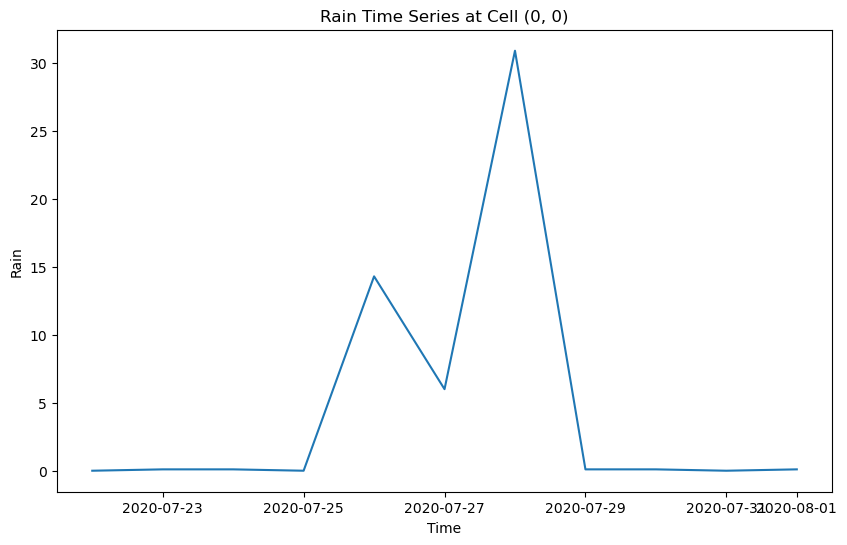

In [48]:
# Select a specific cell (e.g., at index [10, 10])
lat_index = 0
lon_index = 0
rain_at_cell = rain[:, lat_index, lon_index]

# Plot the time series of soil moisture at the selected cell
plt.figure(figsize=(10, 6))
plt.plot(time, rain_at_cell)
plt.xlabel('Time')
plt.ylabel('Rain')
plt.title(f'Rain Time Series at Cell ({lat_index}, {lon_index})')
plt.show()